<a href="https://colab.research.google.com/github/tbonne/IntroDataScience/blob/main/InClassNotebooks/IntroClustering2_highDimensions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1eaZWfBLfmkzNndnA8pJvo6tO4Lm7Qz83' width=500>

# <font color='lightblue'>Data dimensions</font>

In this exercise we will look at adding an extra dimension to our points. We'll look at how changing the problem from 2D to 3D can cause challenges. 

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import cluster
import sklearn as sk


## <font color='lightblue'>Simulating data</font>

Let's simulate some data where we know how many clusters there are. This time we'll add an extra dimension. 

> i.e., let's create 1000 points and set them to class 1. Each point will get a random x, y, and z coordinate.

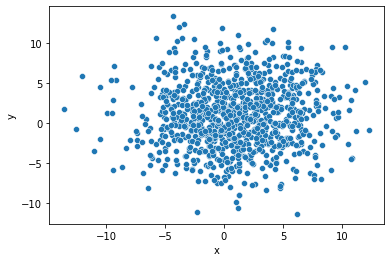

In [ ]:
#simulate some random values
array_class1 = {"x":np.random.normal(1,4, size=1000),
                "y":np.random.normal(1,4, size=1000),
                "z":np.random.normal(1,40, size=1000),
                "class": 1}

#put them in a dataframe
df_class1 = pd.DataFrame(data=array_class1)

#plot it
sns.scatterplot(data=df_class1, x="x",y="y")


Because the cluster is more than 2 dimensions it is hard to visualize with a scatterplot. Let's look at the cluster from the x and z dimension.

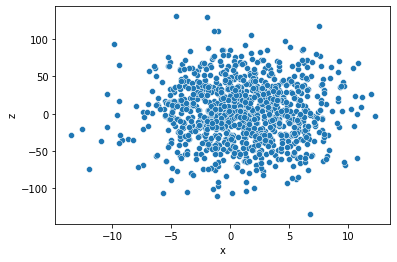

In [ ]:
sns.scatterplot(data=df_class1, x="x",y="z")

Create another set of 1000 points and assign them to class 2. Then we'll add the two sets of points together by using **concat**:


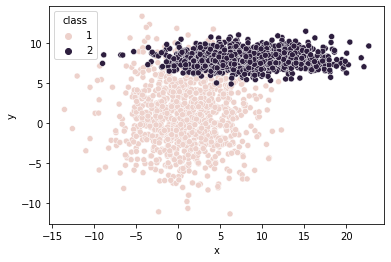

In [ ]:
#generate some random values
array_class2 = {"x":np.random.normal(8,5, size=1000),
                "y":np.random.normal(8,1, size=1000),
                "z":np.random.normal(8,0.5, size=1000),
                "class": 2}

#put them in a dataframe
df_class2 = pd.DataFrame(data=array_class2)

#bind the two dataframes together by rows
df_class = pd.concat([df_class1,df_class2], axis = 0) #axis=0 just says to bind by rows, axis=1 would be by columns 

#plot it
sns.scatterplot(data=df_class, x="x",y="y", hue='class')

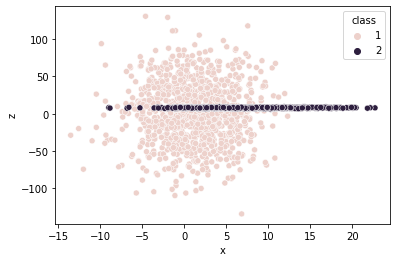

In [ ]:
sns.scatterplot(data=df_class, x="x",y="z", hue='class')


## <font color='lightblue'>Visualizing in 3D</font>

Let's learn how to visualize data in 3D! We'll use **plotly** as it is easy to use and gives us a great interactive plot to use!

In [ ]:
#import plotly
import plotly.express as px

#build a figure with three axis
fig = px.scatter_3d(df_class, x='x', y='y', z='z', color='class')
fig.show()

## <font color='lightblue'>Clustering with many dimensions</font>

Let's try out the clustering in higher dimensions using k-means.
> The approach we use will work the same for HDBScan and many of the other clustering algorithm.

**First** let's build the machine learning algorithm that we will use (i.e., k-means)

In [ ]:
#initalize the kmeans algorithm
clus_kmeans = cluster.KMeans(n_clusters=2) #how many clusters are there?

**Second** let's fit the model using data 
> This is the only difference: we need to make sure we pass all the dimensions when fitting the algorithm

In [ ]:
#fit the model
clus_kmeans.fit(df_class[['x','y','z']] )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Third**, now that the model is built and fit to data we can use it to make predictions!

In [ ]:
#make some predictions
df_class['pred_kmeans'] = clus_kmeans.fit_predict(df_class[['x','y']] )

#take a look
df_class

,x,y,z,class,pred_kmeans
0,2.697895,-2.598734,5.164130,1,1
1,6.548743,-2.555632,4.582389,1,1
2,0.422701,1.782866,10.688116,1,1
3,-9.143375,5.406330,-35.459693,1,1
4,0.596960,-0.570503,11.422699,1,1
...,...,...,...,...,...
995,16.230130,7.655193,8.440308,2,0
996,14.035215,7.479795,7.754771,2,0
997,11.632283,7.501383,8.245827,2,0
998,9.863548,9.242591,8.557914,2,0


Similarly, when measuring the performance of the algorithm we need to include all dimension when making predictions.

In [ ]:
sk.metrics.silhouette_score(X=df_class.loc[:,['x','y','z']],labels=df_class['pred_kmeans'])

0.21761928331835712

## <font color='lightblue'>Further reading</font>

[Plotly tutorials](https://plotly.com/python/plotly-fundamentals/)